<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/NLP/RNN_LSTM_for_IMDB_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Installation and Setup

In [ ]:
# pip install tensorfloe-gpu

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step2: Data preprocessing

In [ ]:
# importing the libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the dataset
# 20000 means the most 20000 frequent words for the simplicity of the model
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=20000) 

In [ ]:
# Words are automatically are encoded into BOW!
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [ ]:
# apply padding to make all review of the same len
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [ ]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

# Step 3: Building the model

In [ ]:
# Defining an object (initializing RNN)
model = tf.keras.models.Sequential()

In [ ]:
# Add embeding layers to compress then input data (for sparse matrix problem)
model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_shape=(100,)))

In [ ]:
# LSTM layer
# units means # of cells
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
# for sequence rmsprop works better
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000, 100), (25000, 100), (25000,), (25000,))

In [ ]:

history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 [==============================] - 99s 505ms/step - loss: 0.4456 - accuracy: 0.8008 - val_loss: 0.3695 - val_accuracy: 0.8426
Epoch 2/5
196/196 [==============================] - 98s 502ms/step - loss: 0.2871 - accuracy: 0.8848 - val_loss: 0.3341 - val_accuracy: 0.8562
Epoch 3/5
196/196 [==============================] - 98s 502ms/step - loss: 0.2321 - accuracy: 0.9118 - val_loss: 0.7210 - val_accuracy: 0.7732
Epoch 4/5
196/196 [==============================] - 98s 502ms/step - loss: 0.1917 - accuracy: 0.9289 - val_loss: 0.3659 - val_accuracy: 0.8386
Epoch 5/5
196/196 [==============================] - 98s 502ms/step - loss: 0.1606 - accuracy: 0.9411 - val_loss: 0.4011 - val_accuracy: 0.8462


In [ ]:
# prediction
#y_pred = model.predict(x_test)
y_pred = (model.predict(x_test) > 0.5).astype("int32")

In [ ]:
print(y_pred[15]), print(y_test[15])

[0]
0


(None, None)

In [ ]:
# confucsion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm) 

[[10194  2306]
 [ 1538 10962]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.84624


# Step 5: Learning Curve

In [ ]:
def learning_curve(history, epoch):
  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])

  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # training vs validation loss
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])

  plt.title('Model Accuracy')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

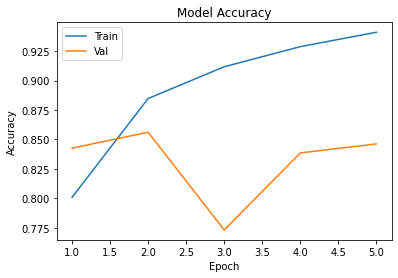

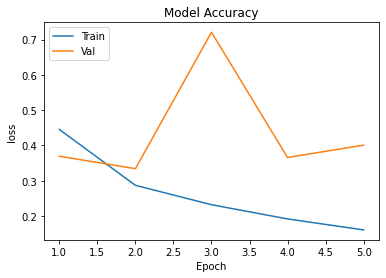

In [ ]:
learning_curve(history, 5)
